# Let's get the connections

In [32]:
import pandas as pd
import torch
import numpy as np
import requests
import matplotlib.pyplot as plt

Get Data From https://github.com/Eyefyre/NYT-Connections-Answers/tree/main

In [2]:
# Define the URL of the raw JSON file
url = 'https://raw.githubusercontent.com/Eyefyre/NYT-Connections-Answers/main/connections.json'

# Send a GET request to fetch the raw JSON content
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    try:
        # Parse the JSON content
        json_data = response.json()
        
        # Convert the JSON data to a Pandas DataFrame
        df = pd.DataFrame(json_data)
        
        # Display the DataFrame
        print(df)
    except requests.exceptions.JSONDecodeError as e:
        print("JSON decoding failed:", e)
else:
    print(f"Failed to retrieve data: {response.status_code}")

      id        date                                            answers
0      1  2023-06-12  [{'level': 0, 'group': 'WET WEATHER', 'members...
1      2  2023-06-13  [{'level': 0, 'group': 'FOOTWEAR', 'members': ...
2      3  2023-06-14  [{'level': 0, 'group': 'FACIAL FEATURES', 'mem...
3      4  2023-06-15  [{'level': 0, 'group': 'SNEAKER BRANDS', 'memb...
4      5  2023-06-16  [{'level': 0, 'group': 'STREAMING SERVICES', '...
..   ...         ...                                                ...
432  433  2024-08-17  [{'level': 0, 'group': 'SPOKEN COMMUNICATION',...
433  434  2024-08-18  [{'level': 0, 'group': 'ALARM CLOCK BUTTONS', ...
434  435  2024-08-19  [{'level': 0, 'group': 'MUSIC GENRES', 'member...
435  436  2024-08-20  [{'level': 0, 'group': 'RUSH OF WIND', 'member...
436  437  2024-08-21  [{'level': 0, 'group': 'COVER WITH A THICK LAY...

[437 rows x 3 columns]


In [3]:
df['answers'][0]

[{'level': 0,
  'group': 'WET WEATHER',
  'members': ['HAIL', 'RAIN', 'SLEET', 'SNOW']},
 {'level': 1,
  'group': 'NBA TEAMS',
  'members': ['BUCKS', 'HEAT', 'JAZZ', 'NETS']},
 {'level': 2,
  'group': 'KEYBOARD KEYS',
  'members': ['OPTION', 'RETURN', 'SHIFT', 'TAB']},
 {'level': 3,
  'group': 'PALINDROMES',
  'members': ['KAYAK', 'LEVEL', 'MOM', 'RACECAR']}]

In [4]:
def parse_levels_to_columns(df, answers_column='answers'):
    """
    Parses the 'members' based on 'level' and adds them as separate columns for each level (0, 1, 2, 3).

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    answers_column (str): The name of the column containing the list of dictionaries.

    Returns:
    pd.DataFrame: The original DataFrame with added columns for each level.
    """
    # Initialize lists to store members for each level
    level_0_members = []
    level_1_members = []
    level_2_members = []
    level_3_members = []

    # Iterate through each row in the DataFrame
    for answer_list in df[answers_column]:
        # Create default empty lists for each level
        level_0 = []
        level_1 = []
        level_2 = []
        level_3 = []

        # Iterate through each dictionary in the list
        for entry in answer_list:
            level = entry['level']
            members = entry['members']

            # Append members to the corresponding level list
            if level == 0:
                level_0 = members
            elif level == 1:
                level_1 = members
            elif level == 2:
                level_2 = members
            elif level == 3:
                level_3 = members

        # Append to the lists that will become new columns
        level_0_members.append(level_0)
        level_1_members.append(level_1)
        level_2_members.append(level_2)
        level_3_members.append(level_3)

    # Add the lists as new columns to the DataFrame
    df['level_0'] = level_0_members
    df['level_1'] = level_1_members
    df['level_2'] = level_2_members
    df['level_3'] = level_3_members

    return df

In [5]:
parsed_df = parse_levels_to_columns(df)
parsed_df

,id,date,answers,level_0,level_1,level_2,level_3
0,1,2023-06-12,"[{'level': 0, 'group': 'WET WEATHER', 'members...","[HAIL, RAIN, SLEET, SNOW]","[BUCKS, HEAT, JAZZ, NETS]","[OPTION, RETURN, SHIFT, TAB]","[KAYAK, LEVEL, MOM, RACECAR]"
1,2,2023-06-13,"[{'level': 0, 'group': 'FOOTWEAR', 'members': ...","[BOOT, LOAFER, PUMP, SNEAKER]","[FOOT, LEAGUE, MILE, YARD]","[ESSENCE, PEOPLE, TIME, US]","[ARE, QUEUE, SEA, WHY]"
2,3,2023-06-14,"[{'level': 0, 'group': 'FACIAL FEATURES', 'mem...","[CHEEK, EYE, MOUTH, NOSE]","[CHOW, GOBBLE, SCARF, WOLF]","[LAB, PEKE, PIT, POM]","[AMIGO, KING, STOOGE, TENOR]"
3,4,2023-06-15,"[{'level': 0, 'group': 'SNEAKER BRANDS', 'memb...","[ADIDAS, NIKE, PUMA, REEBOK]","[CABARET, CAROUSEL, CATS, CHICAGO]","[DUST, MOP, SWEEP, VACUUM]","[BAT, IRON, SPIDER, SUPER]"
4,5,2023-06-16,"[{'level': 0, 'group': 'STREAMING SERVICES', '...","[HULU, NETFLIX, PEACOCK, PRIME]","[KETCHUP, MAYO, RELISH, TARTAR]","[BLUE, DOWN, GLUM, LOW]","[GREEN, MUSTARD, PLUM, SCARLET]"
...,...,...,...,...,...,...,...
432,433,2024-08-17,"[{'level': 0, 'group': 'SPOKEN COMMUNICATION',...","[DIALECT, LANGUAGE, SPEECH, TONGUE]","[FRENCH, KISS, MAKE OUT, NECK]","[BANDAGE, DRESSING, SCISSORS, TAPE]","[COTTAGE, CRAFTSMAN, PRAIRIE, RANCH]"
433,434,2024-08-18,"[{'level': 0, 'group': 'ALARM CLOCK BUTTONS', ...","[ALARM, HOUR, SNOOZE, TIME SET]","[PERHAPS, SAY, SUPPOSE, WHAT IF]","[KISS, NERD, RUNT, WHOPPER]","[DO, DOPE, GRUMP, SLEEP]"
434,435,2024-08-19,"[{'level': 0, 'group': 'MUSIC GENRES', 'member...","[BLUES, COUNTRY, FOLK, ROCK]","[BRAT, BUN, MUSTARD, SAUERKRAUT]","[CHAIR, MOUNTAIN, TREE, WARRIOR]","[COCONUT, SOULMATE, UPDO, WALLET]"
435,436,2024-08-20,"[{'level': 0, 'group': 'RUSH OF WIND', 'member...","[BLOW, DRAFT, GUST, PUFF]","[CRANK, REEL, TURN, WIND]","[BULL, CRAB, LION, RAM]","[CAT, GRINCH, POP, TURTLE]"


In [6]:
work_df = parsed_df.drop(['id' , 'date' , 'answers'] , axis=1)

# We'll use this to compare the grouped up answers in the evaluation section
evaluation_df = parsed_df.drop(['id' , 'date' , 'answers'] , axis=1)
# Convert all words to lowercase
evaluation_df = evaluation_df.applymap(lambda words: [word.lower() for word in words])

# Unravel the lists into separate columns
unraveled_df = pd.concat(
    [work_df[col].apply(pd.Series) for col in work_df.columns], axis=1
)

# Rename the columns based on the original column names
new_columns = []
for col in work_df.columns:
    new_columns.extend([f'{col}_{i+1}' for i in range(4)])

unraveled_df.columns = new_columns

# Assign back to work_df
work_df = unraveled_df

# Convert all words to lowercase
work_df = work_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

work_df

,level_0_1,level_0_2,level_0_3,level_0_4,level_1_1,level_1_2,level_1_3,level_1_4,level_2_1,level_2_2,level_2_3,level_2_4,level_3_1,level_3_2,level_3_3,level_3_4
0,hail,rain,sleet,snow,bucks,heat,jazz,nets,option,return,shift,tab,kayak,level,mom,racecar
1,boot,loafer,pump,sneaker,foot,league,mile,yard,essence,people,time,us,are,queue,sea,why
2,cheek,eye,mouth,nose,chow,gobble,scarf,wolf,lab,peke,pit,pom,amigo,king,stooge,tenor
3,adidas,nike,puma,reebok,cabaret,carousel,cats,chicago,dust,mop,sweep,vacuum,bat,iron,spider,super
4,hulu,netflix,peacock,prime,ketchup,mayo,relish,tartar,blue,down,glum,low,green,mustard,plum,scarlet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,dialect,language,speech,tongue,french,kiss,make out,neck,bandage,dressing,scissors,tape,cottage,craftsman,prairie,ranch
433,alarm,hour,snooze,time set,perhaps,say,suppose,what if,kiss,nerd,runt,whopper,do,dope,grump,sleep
434,blues,country,folk,rock,brat,bun,mustard,sauerkraut,chair,mountain,tree,warrior,coconut,soulmate,updo,wallet
435,blow,draft,gust,puff,crank,reel,turn,wind,bull,crab,lion,ram,cat,grinch,pop,turtle


# Word Embeddings

We need to cast all words to lower case. Pre-trained word embedding models are case sensitive!

In [ ]:
!pip install gensim

In [8]:
# Import necessary libraries
from gensim.models import Word2Vec, FastText, KeyedVectors

***These are pretrained models with 300d word embeddings that I considered Using.***

word2vec: https://www.kaggle.com/datasets/adarshsng/googlenewsvectors
- 3000000 words
- GoogleNews-vectors-negative300

Glove: https://nlp.stanford.edu/projects/glove/
- 6b = wikipedia + gigaword, it has 400k vocab
- 840b = common crawl, it has 2.2 million

Fasttext: https://fasttext.cc/docs/en/english-vectors.html
- wiki-news-300d-1M-subword
- crawl-300d-2M-subword.zip

***I narrowed it down by focusing on word count and input corpus. We have to be thinking whether or not the kinds of words in connections are contained frequently within the input corpus.***

word2vec: GoogleNews-vectors-negative300

glove: glove.840B.300d common crawl 2.2 million words

Fasttext: crawl-300d-2M-subword

In [9]:
'''THIS TAKES A WHILE BUT DOES WORK'''

# Load pre-trained Word2Vec model
word2vec_model = KeyedVectors.load_word2vec_format('embeddings/GoogleNews-vectors-negative300.bin', binary=True)

# Load pre-trained GloVe embeddings
glove_model = KeyedVectors.load_word2vec_format('embeddings/glove.840B.300d.txt', binary=False, no_header=True)

# Load pre-trained FastText model
fasttext_model = KeyedVectors.load_word2vec_format('embeddings/crawl-300d-2M-subword.vec')

# # Load pre-trained BERT model and tokenizer
# bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased') # if we want to use Bert we gotta scale it down to 300d, using PCA or something
# bert_model = BertModel.from_pretrained('bert-base-uncased')

## Make three different dataframes of word embeddings from each model

In [10]:
# Initialize lists to store unrecognized words
unrecognized_words_word2vec = []
unrecognized_words_fasttext = []
unrecognized_words_glove = []

def word2vec(word):
    try:
        return word2vec_model[word]
    except KeyError:
        # Create a random vector for unrecognized words
        random_vector = np.random.rand(word2vec_model.vector_size)
        unrecognized_words_word2vec.append(word)  # Record the unrecognized word
        return random_vector

def fasttext(word):
    try:
        return fasttext_model[word]
    except KeyError:
        # Create a random vector for unrecognized words
        random_vector = np.random.rand(fasttext_model.vector_size)
        unrecognized_words_fasttext.append(word)  # Record the unrecognized word
        return random_vector

def glove(word):
    try:
        return glove_model[word]
    except KeyError:
        # Create a random vector for unrecognized words
        random_vector = np.random.rand(glove_model.vector_size)
        unrecognized_words_glove.append(word)  # Record the unrecognized word
        return random_vector

def get_embeddings(connections_df):
    # Initialize DataFrames to hold embeddings
    word2vec_df = pd.DataFrame(columns=connections_df.columns)
    fasttext_df = pd.DataFrame(columns=connections_df.columns)
    glove_df = pd.DataFrame(columns=connections_df.columns)
    
    for column in connections_df.columns:
        # Initialize lists that will store a column's embeddings
        word2vec_collected = []
        fasttext_collected = []
        glove_collected = []
        
        for word in connections_df[column]:
            # Get embeddings for each word and append to lists
            word2vec_collected.append(word2vec(word))
            fasttext_collected.append(fasttext(word))
            glove_collected.append(glove(word))
        
        word2vec_df[column] = word2vec_collected
        fasttext_df[column] = fasttext_collected
        glove_df[column] = glove_collected

    return word2vec_df, fasttext_df, glove_df, unrecognized_words_word2vec, unrecognized_words_fasttext, unrecognized_words_glove

In [11]:
unrecognized_words_word2vec= []
unrecognized_words_fasttext= []
unrecognized_words_glove = []
word2vec_df, fasttext_df, glove_df, unrecognized_words_word2vec, unrecognized_words_fasttext, unrecognized_words_glove = get_embeddings(work_df)

In [12]:
# Check the number of words in the GloVe model
vocab_size = len(word2vec_model.key_to_index)
print(f"Vocabulary Size: {vocab_size}")
# Check the number of words in the GloVe model
vocab_size = len(glove_model.key_to_index)
print(f"Vocabulary Size: {vocab_size}")
# Check the number of words in the GloVe model
vocab_size = len(fasttext_model.key_to_index)
print(f"Vocabulary Size: {vocab_size}")

Vocabulary Size: 3000000
Vocabulary Size: 2196016
Vocabulary Size: 2000000


In [13]:
# Print the number of unrecognized words for each model
print(f"Number of unrecognized words for Word2Vec: {len(unrecognized_words_word2vec)}")
print(f"Number of unrecognized words for FastText: {len(unrecognized_words_fasttext)}")
print(f"Number of unrecognized words for GloVe: {len(unrecognized_words_glove)}")

Number of unrecognized words for Word2Vec: 167
Number of unrecognized words for FastText: 79
Number of unrecognized words for GloVe: 87


In [14]:
# Save word2vec_df to a CSV file
word2vec_df.to_csv('word2vec_embeddings.csv', index=False)
# Save word2vec_df to a CSV file
fasttext_df.to_csv('fasttext_df.csv', index=False)
# Save word2vec_df to a CSV file
glove_df.to_csv('glove_df.csv', index=False)
# Save work_df to a CSV file
work_df.to_csv('work_df.csv', index=False)

# Clustering Without Dimension Reduction

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_distances
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from skfuzzy import cmeans
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist, squareform
from k_means_constrained import KMeansConstrained
import itertools
from itertools import combinations
import random

### Finds a cluster of four, then removes the four vectors, finds the next cluster, and repeat

Calculates pairwise cosine similarities of every possible group of four to find the best similarity cluster. This cluster is then removed and the next best cluster is calcluated.

In [16]:
def find_best_cluster(embeddings, cluster_size=4):
    # Compute pairwise cosine similarities
    pairwise_similarities = 1 - squareform(pdist(embeddings, metric='cosine'))
    
    # Initialize variables to track the best cluster
    best_score = -np.inf
    best_cluster = None
    
    # Iterate over all possible combinations of cluster_size elements
    for indices in combinations(range(len(embeddings)), cluster_size):
        score = sum(pairwise_similarities[i, j] for i in indices for j in indices if i < j)
        if score > best_score:
            best_score = score
            best_cluster = indices
    
    return best_cluster

def constrained_clustering(embedding_list, word_list, n_clusters=4, cluster_size=4):
    flattened_embeddings = np.vstack(embedding_list)
    flattened_words = word_list
    
    clusters_embeddings = []
    clusters_words = []
    
    while len(flattened_embeddings) >= cluster_size:
        best_cluster_indices = find_best_cluster(flattened_embeddings, cluster_size)
        
        # Extract the best cluster
        best_cluster_embeddings = [flattened_embeddings[i] for i in best_cluster_indices]
        best_cluster_words = [flattened_words[i] for i in best_cluster_indices]
        
        # Append to clusters
        clusters_embeddings.append(best_cluster_embeddings)
        clusters_words.append(best_cluster_words)
        
        # Remove clustered elements
        flattened_embeddings = np.delete(flattened_embeddings, best_cluster_indices, axis=0)
        flattened_words = [word for i, word in enumerate(flattened_words) if i not in best_cluster_indices]
    
    return {
        'embeddings': clusters_embeddings,
        'words': clusters_words
    }

In [17]:
def add_clusters_to_dataframe(df, work_df):
    df_with_clusters = pd.DataFrame()
    
    # Iterate over each row in the DataFrame
    for index in range(len(df)):
        # Get the embeddings and words for the current row
        embedding_list = [df.iloc[index][col] for col in df.columns]
        word_list = [work_df.iloc[index][col] for col in work_df.columns]
        
        # Perform constrained clustering
        clusters = constrained_clustering(embedding_list, word_list)
        
        cluster_data = {}
        for i in range(len(clusters['embeddings'])):
            cluster_data[f'cluster_{i+1}_words'] = [clusters['words'][i]]
        
        # Create a single-row DataFrame for the current row's clusters
        clusters_df = pd.DataFrame(cluster_data)
        
        # Concatenate the single-row DataFrame to the final DataFrame
        df_with_clusters = pd.concat([df_with_clusters, clusters_df], ignore_index=True)
        
    return df_with_clusters

Makes Four Clusters, maximizing net similarity across all clusters

In [18]:
def kmeans_constrained(df, work_df):
    """
    Applies KMeansClustering with constraints to word embeddings for each row in the DataFrame,
    and maps clusters to corresponding words.
    
    Parameters:
    df (pd.DataFrame): A DataFrame where each cell contains a word embedding vector.
    work_df (pd.DataFrame): A DataFrame where each cell contains the corresponding words.
    
    Returns:
    pd.DataFrame: A DataFrame where each row contains lists of words for each cluster.
    """
    num_clusters = 4
    size_min = 4
    size_max = 4
    
    results = []

    for index, row in df.iterrows():
        # Convert the row to a 2D NumPy array of embeddings
        embeddings = np.array([row[i] for i in range(df.shape[1])])

        # Compute the similarity matrix
        sim_matrix = cosine_similarity(embeddings)
        
        # Apply KMeansConstrained
        clf = KMeansConstrained(n_clusters=num_clusters, size_min=size_min, size_max=size_max, random_state=0)
        labels = clf.fit_predict(sim_matrix)
        
        # Map cluster labels to words
        clustered_words = {i: [] for i in range(num_clusters)}
        for i, label in enumerate(labels):
            word = work_df.iloc[index, i]
            clustered_words[label].append(word)
        
        # Append results
        result_row = {
            'Cluster 1': clustered_words[0],
            'Cluster 2': clustered_words[1],
            'Cluster 3': clustered_words[2],
            'Cluster 4': clustered_words[3]
        }
        results.append(result_row)
    
    # Convert the results to a DataFrame
    result_df = pd.DataFrame(results)
    
    return result_df

Fuzzy C means is a method of soft clustering. I use it at the end to take a closer look at the most recent connections

In [19]:
def fuzzy_cmeans(df, work_df, num_clusters=4, m=1.45, max_iter=100, error=1e-5):
    """
    Applies Fuzzy C-Means Clustering to word embeddings for each row in the DataFrame,
    and maps clusters to corresponding words with membership degrees.
    
    Parameters:
    df (pd.DataFrame): A DataFrame where each cell contains a word embedding vector.
    work_df (pd.DataFrame): A DataFrame where each cell contains the corresponding words.
    num_clusters (int): The number of clusters for Fuzzy C-Means.
    m (float): The fuzziness parameter, usually set to 2.0.
    max_iter (int): Maximum number of iterations for the Fuzzy C-Means algorithm.
    error (float): Convergence criterion for the Fuzzy C-Means algorithm.
    
    Returns:
    pd.DataFrame: A DataFrame where each row contains lists of words for each cluster
                  along with their membership degrees.
    """
    results = []

    for index, row in df.iterrows():
        # Convert the row to a 2D NumPy array of embeddings
        embeddings = np.array([row[i] for i in range(df.shape[1])])
        
        # Normalize the embeddings
        scaler = StandardScaler()
        embeddings = scaler.fit_transform(embeddings)
        
        # Compute the similarity matrix
        sim_matrix = cosine_similarity(embeddings)
        
        # Apply Fuzzy C-Means
        cntr, u, u0, d, jm, p, fpc = cmeans(
            sim_matrix.T,  # Transpose to match the shape required by cmeans
            c=num_clusters,
            m=m,
            maxiter=max_iter,
            error=error,
            init=None,
            seed=42
        )
        
        # Map membership degrees to words
        cluster_memberships = np.argmax(u, axis=0)
        memberships = {i: [] for i in range(num_clusters)}
        
        for i, membership in enumerate(u.T):
            words = work_df.iloc[index].tolist()
            for cluster_index, degree in enumerate(membership):
                if degree > 0:
                    memberships[cluster_index].append((words[i], degree))
        
        # Sort words within each cluster by membership degree
        sorted_memberships = {i: sorted(memberships[i], key=lambda x: x[1], reverse=True) for i in range(num_clusters)}
        
        # Append results
        result_row = {
            f'Cluster {i+1}': sorted_memberships[i] for i in range(num_clusters)
        }
        results.append(result_row)
    
    # Convert the results to a DataFrame
    result_df = pd.DataFrame(results)
    
    return result_df

### Maximizing Similarity In Cluster 1, then 2, then 3, & then 4.

**Word2Vec**

In [22]:
df_with_clusters_word2vec = add_clusters_to_dataframe(word2vec_df  , work_df)

**Fasttext**

In [23]:
df_with_clusters_fasttext = add_clusters_to_dataframe(fasttext_df  , work_df)

**GloVe**

In [24]:
df_with_clusters_glove = add_clusters_to_dataframe(glove_df  , work_df)

### Constrained KMeans

***Word2Vec***

In [25]:
df_with_kmeans_constrained_word2vec = kmeans_constrained(word2vec_df  , work_df)

***Fasttext***

In [26]:
df_with_kmeans_constrained_fasttext = kmeans_constrained(fasttext_df  , work_df)

***Glove***

In [27]:
df_with_kmeans_constrained_glove = kmeans_constrained(glove_df  , work_df)

# Clustering with Dimension Reduction

In [28]:
from sklearn.decomposition import PCA

Use PCA to address the curse of dimensionality and analyze how this affects the clustering.

In [29]:
def ppa(word_embeddings_df, n_components):
    """
    Apply the Post-Processing Algorithm (PPA) to a DataFrame of word embeddings.

    Parameters:
    - word_embeddings_df: A DataFrame where each cell contains a word embedding vector.
    - n_components: The number of top principal components to remove.

    Returns:
    - A DataFrame with processed embeddings, maintaining the same shape as the input.
    """
    # Flatten the DataFrame to a 2D numpy array where each row is an embedding
    embeddings_array = np.vstack(word_embeddings_df.values.flatten())
    
    # Calculate the mean vector
    mean_vector = np.mean(embeddings_array, axis=0)
    
    # Center the embeddings by subtracting the mean vector
    centered_embeddings = embeddings_array - mean_vector
    
    # Apply PCA to the entire dataset
    pca = PCA(n_components=n_components)
    pca.fit(centered_embeddings)

    # Remove top principal components from each embedding
    top_components = pca.components_
    reduced_embeddings = centered_embeddings - np.dot(np.dot(centered_embeddings, top_components.T), top_components)
    
    # Reshape the reduced embeddings back to the original DataFrame structure
    reshaped_embeddings = reduced_embeddings.reshape(word_embeddings_df.shape[0], word_embeddings_df.shape[1], -1)
    
    # Convert back to DataFrame with the same structure
    processed_df = pd.DataFrame({
        col: list(reshaped_embeddings[:, i, :]) for i, col in enumerate(word_embeddings_df.columns)
    }, index=word_embeddings_df.index)
    
    return processed_df

In [30]:
def plot_explained_variance(word_embeddings_df, df_name):
    """
    Plot the explained variance for each principal component.

    Parameters:
    - word_embeddings_df: A DataFrame where each cell contains a word embedding vector.
    - n_components: Number of principal components to consider. If None, all components are used.
    """
    # Flatten the DataFrame to a 2D numpy array where each row is an embedding
    all_embeddings = np.vstack(word_embeddings_df.values.flatten())

    # check what is the best n components
    pca = PCA(n_components=50)
    pca.fit(all_embeddings)
    
    var = pca.explained_variance_ratio_
    plt.figure(figsize=(15, 8))
    plt.bar(list(range(var.shape[0])),var)
    feature = range(pca.n_components_)
    plt.title(df_name)
    plt.xlabel('PCA components')
    plt.ylabel('variance %')
    plt.xticks(feature)
    plt.show()

By examining how the principle components explain variance, we can decide how many top components to remove from our embeddings. This will make the remaining components more discriminative. 

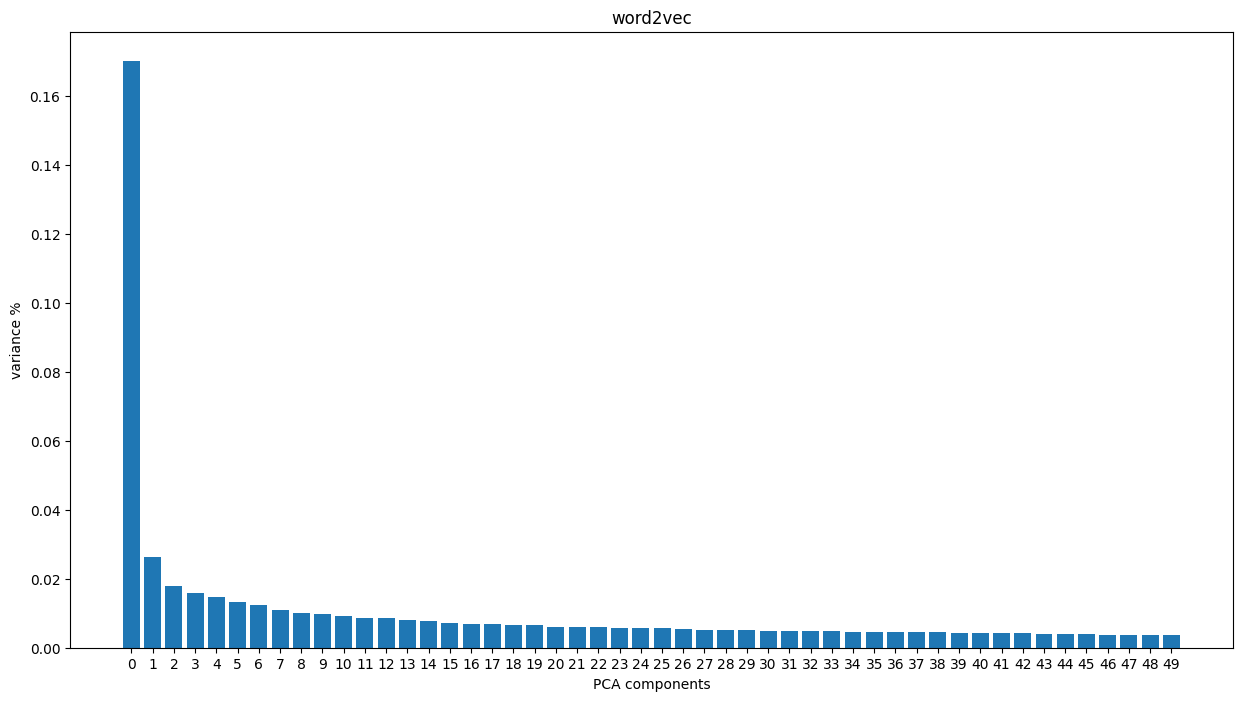

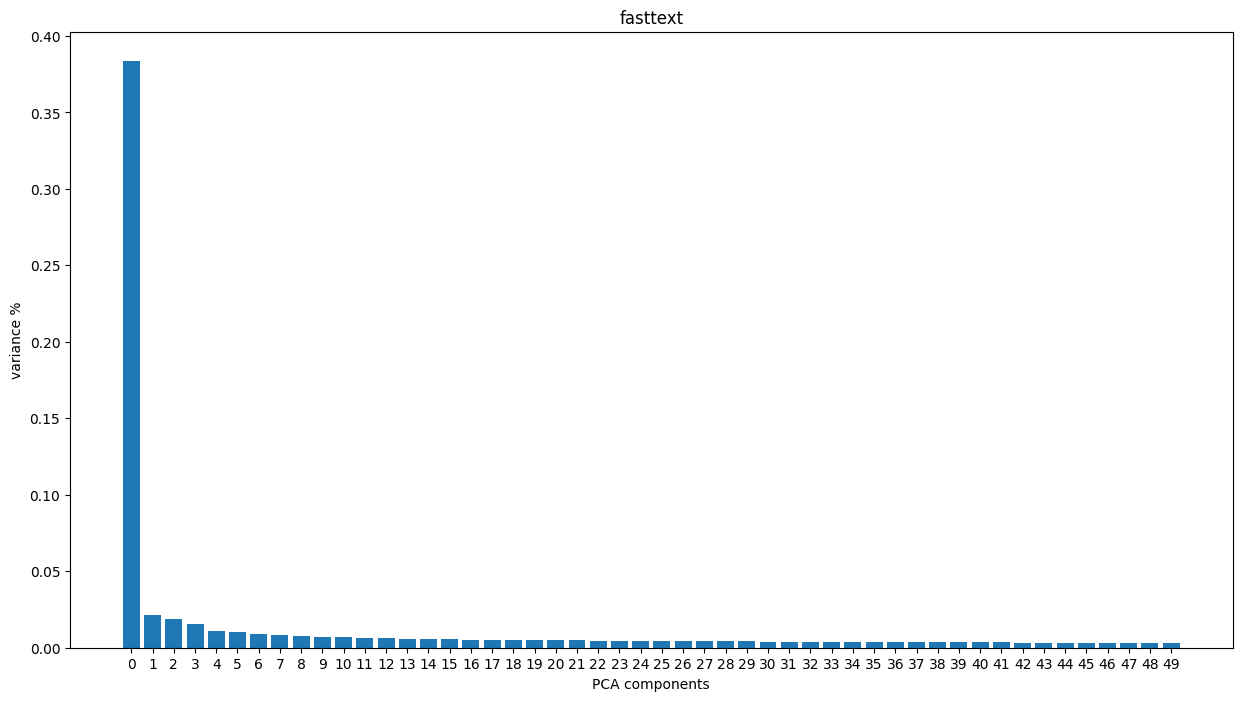

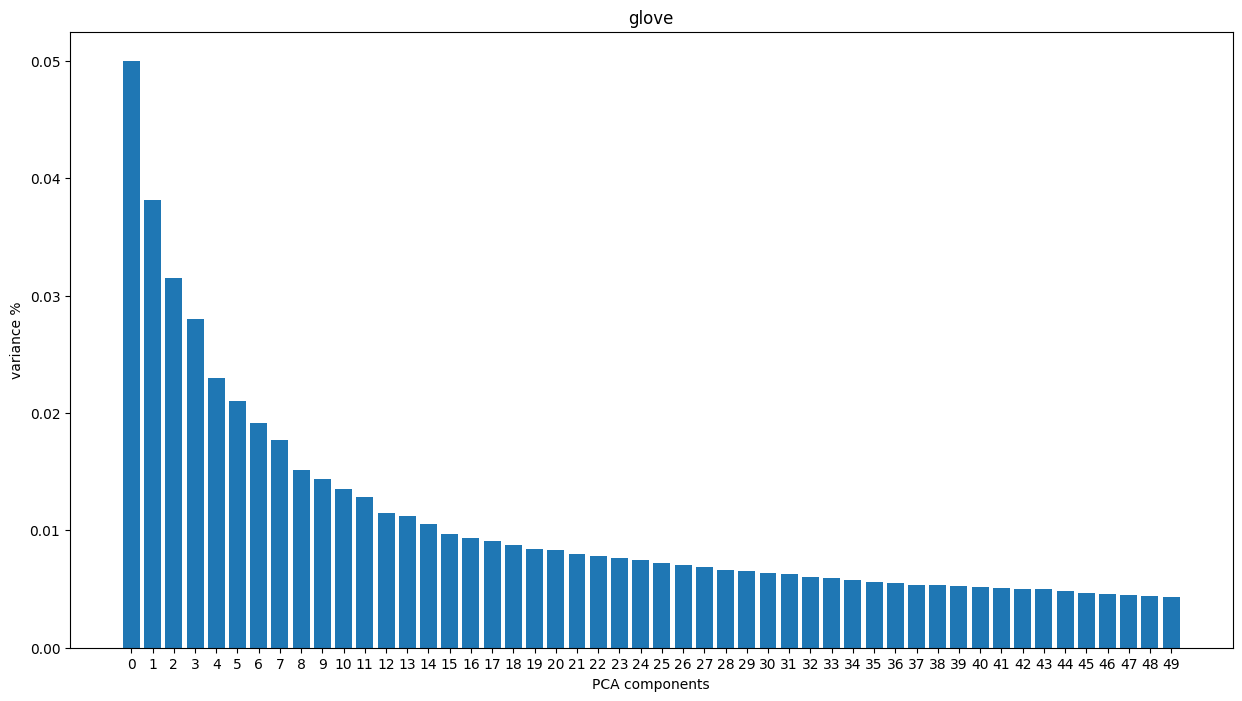

In [33]:
reduced_word2vec_df = plot_explained_variance(word2vec_df, 'word2vec')
reduced_fasttext_df = plot_explained_variance(fasttext_df, 'fasttext')
reduced_glove_df = plot_explained_variance(glove_df, 'glove')

Something else to try is PPA -> PCA -> PPA                
Source: https://lld-workshop.github.io/2017/papers/LLD_2017_paper_34.pdf 

In [48]:
# Post-Processing Algorithm (PPA). Remove Principle components 
reduced_word2vec_df = ppa(word2vec_df, 1) # remove the ideal number principle components
reduced_fasttext_df = ppa(fasttext_df, 0) # remove the ideal number principle components
reduced_glove_df = ppa(glove_df, 2) # remove the ideal number principle components

**Word2Vec**

In [49]:
df_with_clusters_word2vec_ppa = add_clusters_to_dataframe(reduced_word2vec_df  , work_df)

In [50]:
df_with_kmeans_constrained_word2vec_ppa = kmeans_constrained(reduced_word2vec_df  , work_df)

**Fasttext**

In [51]:
df_with_clusters_fasttext_ppa = add_clusters_to_dataframe(reduced_fasttext_df  , work_df)

In [52]:
df_with_kmeans_constrained_fasttext_ppa = kmeans_constrained(reduced_fasttext_df  , work_df)

**GloVe**

In [53]:
# Initialize an empty DataFrame to store all clusters
df_with_clusters_glove_ppa = add_clusters_to_dataframe(reduced_glove_df  , work_df)

In [54]:
df_with_kmeans_constrained_glove_ppa = kmeans_constrained(reduced_glove_df  , work_df)

# Evaluation

In [47]:
evaluations = {}

In [42]:
from sklearn.metrics import jaccard_score

In [43]:
def calculate_net_jaccard_similarity(evaluation_df, df_with_clusters):
    """
    Calculate the net Jaccard similarity metric between two DataFrames.

    Parameters:
    - work_df: DataFrame containing predefined groups of words.
    - df_with_clusters: DataFrame containing clustered groups of words.

    Returns:
    - net_metric: The average Jaccard similarity across all comparisons.
    """
    # Ensure both DataFrames have the same number of rows
    assert len(evaluation_df) == len(df_with_clusters), "DataFrames must have the same number of rows."

    # Initialize variables for net metric
    total_similarity = 0
    comparison_count = 0

    # Compare each row in both DataFrames
    for index in range(len(evaluation_df)):
       #print(f"Row {index + 1}:")
        used_clusters = set()  # Track used clusters
        for predefined_idx in range(4):
            predefined_group = evaluation_df.iloc[index, predefined_idx]
            
            # Find the best matching cluster that hasn't been used yet
            best_similarity = 0
            best_cluster_idx = -1
            for cluster_idx in range(4):
                if cluster_idx in used_clusters:
                    continue  # Skip already used clusters
                
                clustered_words = df_with_clusters.iloc[index, cluster_idx]
                # Calculate Jaccard similarity with zero_division parameter
                similarity = jaccard_score(
                    [1 if word in clustered_words else 0 for word in predefined_group],
                    [1 if word in predefined_group else 0 for word in clustered_words],
                    average='binary',
                    zero_division=0  # Set zero_division to handle empty comparisons
                )
                
                if similarity > best_similarity:
                    best_similarity = similarity
                    best_cluster_idx = cluster_idx
            
            # Mark the best cluster as used
            used_clusters.add(best_cluster_idx)
            
            # Print the best matching cluster
            best_cluster_words = df_with_clusters.iloc[index, best_cluster_idx]
            # print(f"  Predefined Group {predefined_idx + 1}:")
            # print(f"    Predefined Words: {predefined_group}")
            # print(f"    Best Matching Cluster: {best_cluster_idx + 1}")
            # print(f"    Clustered Words: {best_cluster_words}")
            # print(f"    Jaccard Similarity: {best_similarity:.2f}\n")
            
            # Accumulate similarity for net metric
            total_similarity += best_similarity
            comparison_count += 1

    # Calculate and return the net metric
    net_metric = total_similarity / comparison_count if comparison_count > 0 else 0
    print(f"Net Jaccard Similarity Metric: {net_metric:.4f}")
    return net_metric

This is for ideal PPA Components Dropped, which we investigate further below

In [55]:
# Evaluate Clustering maximize single clusters 
evaluations['clusters_word2vec'] = calculate_net_jaccard_similarity(evaluation_df, df_with_clusters_word2vec)
evaluations['clusters_fasttext'] = calculate_net_jaccard_similarity(evaluation_df, df_with_clusters_fasttext)
evaluations['clusters_glove'] = calculate_net_jaccard_similarity(evaluation_df, df_with_clusters_glove)

# Constrained KMeans
evaluations['KMeans_constrained_word2vec'] = calculate_net_jaccard_similarity(evaluation_df, df_with_kmeans_constrained_word2vec)
evaluations['KMeans_constrained_fasttext'] = calculate_net_jaccard_similarity(evaluation_df, df_with_kmeans_constrained_fasttext)
evaluations['KMeans_constrained_glove'] = calculate_net_jaccard_similarity(evaluation_df, df_with_kmeans_constrained_glove)

# Evaluate Clustering maximize single clusters with PPA
evaluations['clusters_word2vec_ppa'] = calculate_net_jaccard_similarity(evaluation_df, df_with_clusters_word2vec_ppa)
evaluations['clusters_fasttext_ppa'] = calculate_net_jaccard_similarity(evaluation_df, df_with_clusters_fasttext_ppa)
evaluations['clusters_glove_ppa'] = calculate_net_jaccard_similarity(evaluation_df, df_with_clusters_glove_ppa)

# Constrained KMeans with PPA
evaluations['KMeans_constrained_word2vec_ppa'] = calculate_net_jaccard_similarity(evaluation_df, df_with_kmeans_constrained_word2vec_ppa)
evaluations['KMeans_constrained_fasttext_ppa'] = calculate_net_jaccard_similarity(evaluation_df, df_with_kmeans_constrained_fasttext_ppa)
evaluations['KMeans_constrained_glove_ppa'] = calculate_net_jaccard_similarity(evaluation_df, df_with_kmeans_constrained_glove_ppa)

Net Jaccard Similarity Metric: 0.6400
Net Jaccard Similarity Metric: 0.6714
Net Jaccard Similarity Metric: 0.6521
Net Jaccard Similarity Metric: 0.6594
Net Jaccard Similarity Metric: 0.6922
Net Jaccard Similarity Metric: 0.6583
Net Jaccard Similarity Metric: 0.6574
Net Jaccard Similarity Metric: 0.6798
Net Jaccard Similarity Metric: 0.6725
Net Jaccard Similarity Metric: 0.6583
Net Jaccard Similarity Metric: 0.6766
Net Jaccard Similarity Metric: 0.6539


In [56]:
results_df = pd.DataFrame.from_dict(evaluations , orient = 'index')
results_df

,0
clusters_word2vec,0.639969
clusters_fasttext,0.671434
clusters_glove,0.652079
KMeans_constrained_word2vec,0.659420
KMeans_constrained_fasttext,0.692220
KMeans_constrained_glove,0.658276
clusters_word2vec_ppa,0.657418
clusters_fasttext_ppa,0.679825
clusters_glove_ppa,0.672483
KMeans_constrained_word2vec_ppa,0.658276


**Our best performer is kmeans constrained fasttext trained on the common crawl!!!**

### Let's try different numbers of components to drop (Optimize PPA)

In [ ]:
for i in range(15):
    reduced_word2vec_df = ppa(word2vec_df, i) # remove the first principle component
    reduced_fasttext_df = ppa(fasttext_df, i) # remove the first principle component
    reduced_glove_df = ppa(glove_df, i) # remove the first principle component
    
    # Clustering By Single Group Priority
    df_with_clusters_word2vec_ppa = add_clusters_to_dataframe(reduced_word2vec_df  , work_df)
    df_with_clusters_fasttext_ppa = add_clusters_to_dataframe(reduced_fasttext_df  , work_df)
    df_with_clusters_glove_ppa = add_clusters_to_dataframe(reduced_glove_df  , work_df)

    # KMeans Constrained
    df_kmeans_constrained_word2vec_ppa = kmeans_constrained(reduced_word2vec_df  , work_df)
    df_kmeans_constrained_fasttext_ppa = kmeans_constrained(reduced_fasttext_df  , work_df)
    df_kmeans_constrained_glove_ppa = kmeans_constrained(reduced_glove_df  , work_df)

    evaluations[f'clusters_word2vec_ppa{i}'] = calculate_net_jaccard_similarity(evaluation_df, df_with_clusters_word2vec_ppa)
    evaluations[f'clusters_fasttext_ppa{i}'] = calculate_net_jaccard_similarity(evaluation_df, df_with_clusters_fasttext_ppa)
    evaluations[f'clusters_glove_ppa{i}'] = calculate_net_jaccard_similarity(evaluation_df, df_with_clusters_glove_ppa)

    evaluations[f'kmeans_constrained_word2vec_ppa{i}'] = calculate_net_jaccard_similarity(evaluation_df, df_kmeans_constrained_word2vec_ppa)
    evaluations[f'kmeans_constrained_fasttext_ppa{i}'] = calculate_net_jaccard_similarity(evaluation_df, df_kmeans_constrained_fasttext_ppa)
    evaluations[f'kmeans_constrained_glove_ppa{i}'] = calculate_net_jaccard_similarity(evaluation_df, df_kmeans_constrained_glove_ppa)

results_df = pd.DataFrame.from_dict(evaluations , orient = 'index')
results_df

In [63]:
# Set display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Display the DataFrame
results_df

,0
clusters_word2vec,0.639969
clusters_fasttext,0.671434
clusters_glove,0.652079
KMeans_constrained_word2vec,0.659420
KMeans_constrained_fasttext,0.692220
KMeans_constrained_glove,0.658276
clusters_word2vec_ppa,0.657418
clusters_fasttext_ppa,0.679825
clusters_glove_ppa,0.672483
KMeans_constrained_word2vec_ppa,0.658276


In [ ]:
# Optionally, reset the display options if desired
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.max_colwidth')

**Best Number of Components to Drop**

*Word2Vec*

Highest value: 0.656250

Components Dropped: 1

Source: clusters_word2vec_ppa1

*FastText*

Highest value: 0.685589

Components Dropped: 2

Source: clusters_fasttext_ppa2

*Glove*

Highest value: 0.673452

Components Dropped: 2

Source: clusters_glove_ppa2

### Lets take a Closer look at the most recent connections using Fasttext with PPA 2

In [57]:
df_with_kmeans_constrained_fasttext.iloc[len(df_with_kmeans_constrained_fasttext)-3]

Cluster 1          [blues, country, folk, rock]
Cluster 2      [brat, bun, mustard, sauerkraut]
Cluster 3       [chair, soulmate, updo, wallet]
Cluster 4    [mountain, tree, warrior, coconut]
Name: 434, dtype: object

In [58]:
evaluation_df.iloc[len(evaluation_df)-3]

level_0         [blues, country, folk, rock]
level_1     [brat, bun, mustard, sauerkraut]
level_2     [chair, mountain, tree, warrior]
level_3    [coconut, soulmate, updo, wallet]
Name: 434, dtype: object

Now let's try soft clustering the fasttext_df

In [61]:
fuzzy_fasttext_ppa2 = fuzzy_cmeans(fasttext_df , work_df)

In [64]:
fuzzy_fasttext_ppa2.iloc[len(fuzzy_fasttext_ppa2)-3]

Cluster 1          [(folk, 0.93124411171614), (blues, 0.9067067792242076), (rock, 0.8063936312682269), (tree, 0.18493110726960293), (brat, 0.15132475436521545), (chair, 0.14488340551132914), (warrior, 0.09882460556068402), (country, 0.08882944155580683), (mountain, 0.08358941756082143), (wallet, 0.08059063805487099), (soulmate, 0.07980098487422971), (coconut, 0.07524011149306724), (mustard, 0.04763254751506531), (sauerkraut, 0.02998654770845277), (updo, 0.009645963219503778), (bun, 0.00573706448427974)]
Cluster 2               [(mountain, 0.7812604792840567), (country, 0.7478468138641734), (warrior, 0.734345274999021), (soulmate, 0.6255498661747833), (wallet, 0.42940479966268474), (chair, 0.42139240766473307), (tree, 0.4191166809601328), (brat, 0.22341372513853694), (coconut, 0.17082604406758095), (mustard, 0.10553850656624603), (sauerkraut, 0.08772392779363945), (rock, 0.084720508514542), (blues, 0.044453579904381514), (folk, 0.03666516675594), (updo, 0.00957055283545959), (bun, 0.005

# Future Plans

- Different Post Processing Algorithms on the Word Embeddings (i.e. PPA -> PCA -> PPA)
- Different Clustering Techniques. Maybe use something similar to the greedy cluster similarity maximizer and kmeans constrained we did for the first two groups, then for the two harder groups, we can try a more brute force approach.
- Train word embeddings on corpus more in tune with NYT connections game

# Sanity Check (Ignore)

In [ ]:
# words = [
#     "blow", "draft", "gust", "puff",
#     "crank", "reel", "turn", "wind",
#     "bull", "crab", "lion", "ram",
#     "cat", "grinch", "pop", "turtle"
# ]
words = [
    "apple", "gun", "dog", "star",
    "prune", "knife", "cat", "planet",
    "orange", "sword", "bird", "moon",
    "pear", "bomb", "fish", "sun"
]

# Create a DataFrame from the list and transpose it
words_df = pd.DataFrame(words, columns=['Word']).T

# Shuffle the columns
shuffled_columns = np.random.permutation(words_df.columns)
shuffled_df = words_df[shuffled_columns]
shuffled_df

In [ ]:
word2vec_df, fasttext_df, glove_df, unrecognized_words_word2vec, unrecognized_words_fasttext, unrecognized_words_glove = get_embeddings(shuffled_df)

In [ ]:
test_cluster = kmeans_constrained(word2vec_df , shuffled_df)
test_cluster

In [ ]:
test_cluster = fuzzy_cmeans(word2vec_df , shuffled_df)
test_cluster['Cluster 1']